In [1]:
%matplotlib inline

import os,sys,json
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_path = os.path.join('..','data')

sys.path.append(os.path.join('..','scripts'))
from ras_method import ras_method
from country_level_IO import INDEC,GTAP,OECD,EORA

### Compare data

In [2]:
%%time
INDEC_IO = INDEC()
GTAP_IO = GTAP()
OECD_IO = OECD()
EORA_IO = EORA() 

Wall time: 55.3 s


In [12]:
sectors = pd.read_excel(os.path.join(data_path,'industry_high_level_classification.xlsx'))

In [14]:
totals

,GDP,ValueA
INDEC (ARS 2015),1.523300e+07,5.009211e+06
OECD (ARS 2015),1.804850e+07,6.360928e+06
EORA (ARS 2015),1.319600e+07,4.683261e+06
GTAP (ARS 2014),1.146816e+07,4.170421e+06


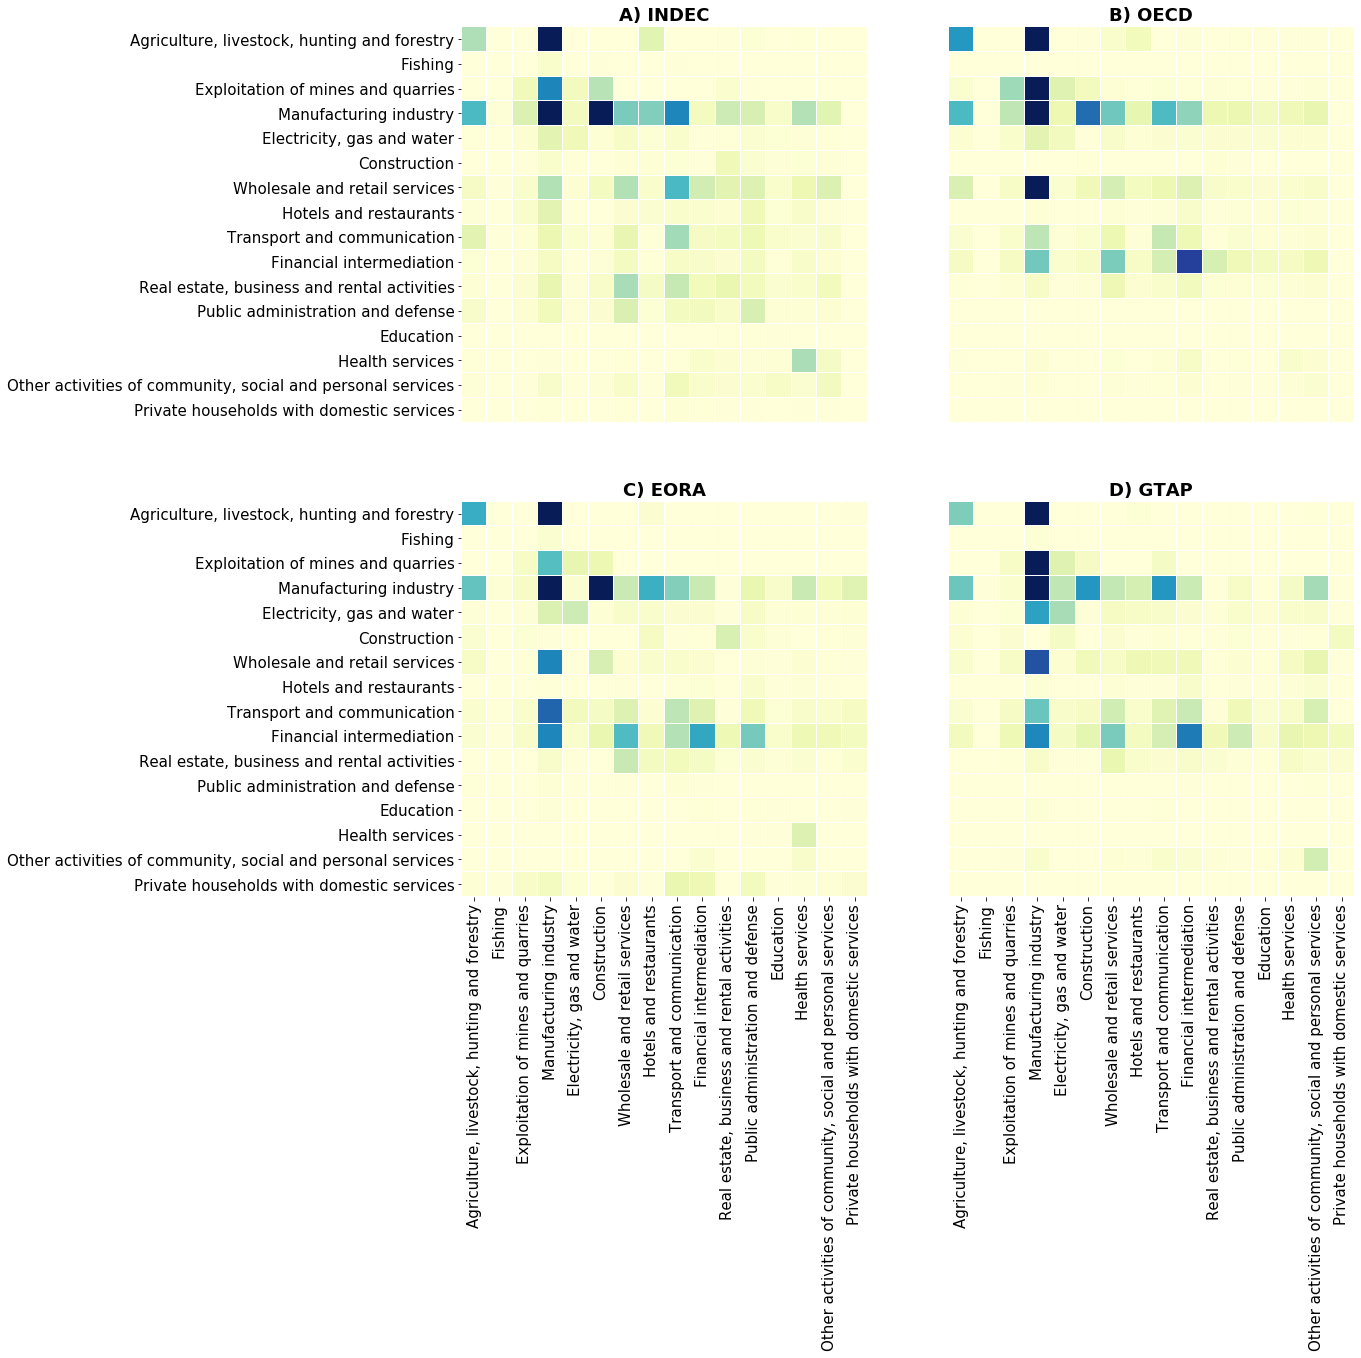

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.flatten()):
    if i == 0:
        table = pd.DataFrame(np.array(INDEC_IO.iloc[:16,:16]),columns=list(sectors['English classification']),index=list(sectors['English classification']))
        sns.heatmap(table.iloc[:16,:16]/table.sum().sum(), cmap="YlGnBu", linewidths=.01, vmax=0.05,ax=ax, cbar=False, xticklabels=False)
        ax.set_title('A) INDEC', fontsize=18, fontweight='bold')
    elif i == 1:
        table = pd.DataFrame(np.array(OECD_IO.iloc[:16,:16]),columns=list(sectors['English classification']),index=list(sectors['English classification']))
        ax.set_title('B) OECD', fontsize=18, fontweight='bold')
        sns.heatmap(table.iloc[:16,:16]/table.sum().sum(), cmap="YlGnBu", linewidths=.01, vmax=0.05,ax=ax, cbar=False, xticklabels=False, yticklabels=False)
    elif i == 2:
        table = pd.DataFrame(np.array(EORA_IO.iloc[:16,:16]),columns=list(sectors['English classification']),index=list(sectors['English classification']))
        ax.set_title('C) EORA', fontsize=18, fontweight='bold')
        sns.heatmap(table.iloc[:16,:16]/table.sum().sum(), cmap="YlGnBu", linewidths=.01, vmax=0.05,ax=ax, cbar=False)
    elif i == 3:
        table = pd.DataFrame(np.array(GTAP_IO.iloc[:16,:16]),columns=list(sectors['English classification']),index=list(sectors['English classification']))
        ax.set_title('D) GTAP', fontsize=18, fontweight='bold')
        sns.heatmap(table.iloc[:16,:16]/table.sum().sum(), cmap="YlGnBu", linewidths=.01, vmax=0.05,ax=ax, cbar=False, yticklabels=False)
    
    ax.set_xticklabels(labels=list(sectors['English classification']),fontsize=15)
    ax.set_yticklabels(labels=list(sectors['English classification']),fontsize=15)

plt.savefig(os.path.join(data_path,'table_comparison.png'),dpi=400,bbox_inches='tight')